# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [11]:
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
          'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
           'A14', 'A15', 'A16']

df = pd.read_csv('https://raw.githubusercontent.com/mmastin/Datasets/master/crx.data',
                names=columns, na_values='?')

print(df.shape)
df.head()

# correct attributes, correct shape

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [4]:
# Two columns - A11 and A15 are continuous variables and should be floats, but are integers
# Changing to floats

df = df.astype({'A11': float, 'A15': float})

In [5]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [6]:
df.isnull().sum()

# NaN's properly converted

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [12]:
df.isnull().sum().sum()

67

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [13]:
approved = df[df['A16'] == '+']

print(approved.shape)
approved.head()

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [14]:
rejected = df[df['A16'] == '-']

print(rejected.shape)
rejected.head()

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


In [15]:
# Split into Approved and Rejected dataframes, shape matches given info
# Looking at the distribution numbers for Approved and Rejected

approved.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [16]:
rejected.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [29]:
# For Approved, the mean of columns A2, A3, A8, A11, & A15 are higher
# For Rejected, the mean of column A14 is higher

stats.ttest_ind(approved['A15'], rejected['A15'], nan_policy='omit')

# The Approved mean of A15 is higher than Rejected at a 95% confidence level

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [34]:
# A14 column appears to not have much difference between the two datasets
# A14 has a much higher p-value, but is still statistically significantly different

stats.ttest_ind(approved['A14'], rejected['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [35]:
# Looking at distribution of the categorical variables 

df.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [47]:
approved['A6'].value_counts()

c     62
q     51
w     33
x     32
cc    29
aa    19
m     16
e     14
k     14
i     14
ff     7
d      7
j      3
r      2
Name: A6, dtype: int64

In [46]:
rejected['A6'].value_counts()

c     75
ff    46
i     45
k     37
aa    35
w     31
q     27
d     23
m     22
cc    12
e     11
j      7
x      6
r      1
Name: A6, dtype: int64

In [95]:
# Making contingency tables to calculate chi-squared value of categorical variables

contingency_table = pd.crosstab(df['A16'], df['A6'])
contingency_table

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6


In [96]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# High chi-square and low p-value for row A6
# Reject the null hypothesis that it's independent from approved and rejected
# A6 is associated with approval

Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]
 [29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]]


In [93]:
contingency_table2 = pd.crosstab(df['A16'], df['A1'])
contingency_table2

A1,a,b
A16,,
+,98,206
-,112,262


In [94]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table2)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# Low chi-square and high p-value
# Cannot reject that null hypothesis that A1 is independent from approval

Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]]


In [60]:
import matplotlib.pyplot as plt

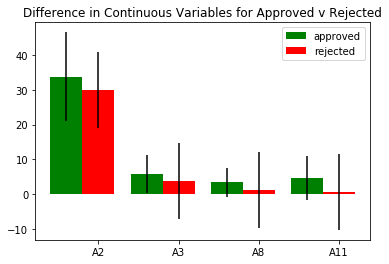

In [90]:
# Plotting first four continuous variables with std lines
# Variables A14 & A15 so large they minimize other variables too low to see

barwidth = 0.4

bars_app = [approved['A2'].mean(), approved['A3'].mean(),
           approved['A8'].mean(), approved['A11'].mean()]
bars_rej = [rejected['A2'].mean(), rejected['A3'].mean(),
           rejected['A8'].mean(), rejected['A11'].mean()]

yer_app = [np.std(approved['A2']), np.std(approved['A3']),
          np.std(approved['A8']), np.std(approved['A11'])]
yer_rej = [np.std(rejected['A2']), np.std(rejected['A2']),
          np.std(rejected['A2']), np.std(rejected['A2'])]

r1 = np.arange(len(bars_app))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars_app, width = barwidth, color = 'green', yerr = yer_app, label = 'approved')
plt.bar(r2, bars_rej, width = barwidth, color = 'red', yerr = yer_rej, label = 'rejected')

plt.xticks([r + barwidth for r in range(len(bars_app))], ['A2', 'A3', 'A8', 'A11'])
plt.legend()

plt.title('Difference in Continuous Variables for Approved v Rejected')
plt.show();

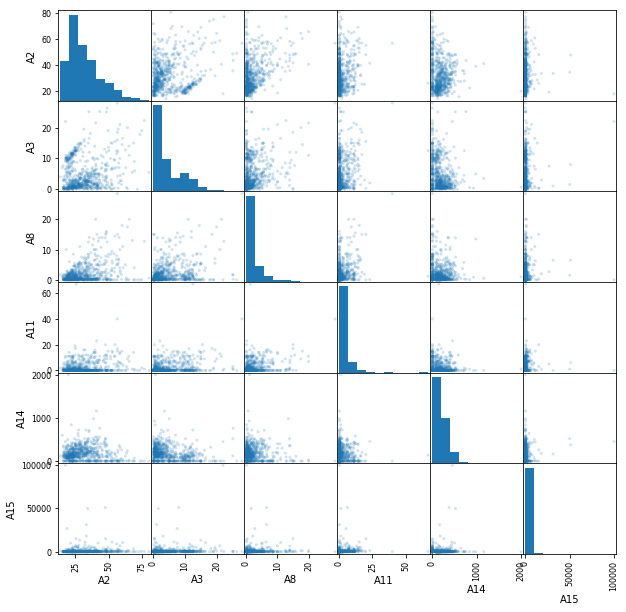

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize = (10, 10));

In [92]:
df.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


#### 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

I answered in comments throughout notebook, but pasting again here:

Using t-test for the continuous variables:

For Approved, the mean of columns A2, A3, A8, A11, & A15 are higher
For Rejected, the mean of column A14 is higher
The Approved mean of A15 is higher than Rejected at a 95% confidence level

A14 column appears to not have much difference between the two datasets
A14 has a much higher p-value (than A15), but is still statistically significantly different

Using contingency tables & chi-square for the categorical features:

High chi-square and low p-value for row A6
Reject the null hypothesis that it's independent from approved and rejected
A6 is associated with approval

For column A1, low chi-square and high p-value
Cannot reject that null hypothesis that A1 is independent from approval

The most challenging part was probably thinking of how to visualize the data without knowing what the columns represented. 

In [91]:
pd.__version__

'0.24.2'